# Spam or Ham?

## Lab Assignment Two: Exploring Text Data 

### Justin Ledford, Luke Wood, Traian Pop 
___

## Business Understanding
Business Understanding (10 points total).  
[10 points] Give an overview of the dataset. Describe the purpose of the data set you selected (i.e., why was this data collected in the first place?). Why is this data important and how will you know if you have gathered useful knowledge from the dataset? Be specific and use your own words to describe the aspects of the data.


### Data Background
SMS messages play a huge role in a peron's life, and the confidentiality and integrity of said messages are of the highest priority to mobile carriers around the world. Due to this fact, many unlawful individuals and groups try and take advatange of the average consumer by flooding their inbox with spam, and while the majority of people successfully avoid it, there are people out there affected negatively by falling for false messages.  

The data we selected is a compilation of 5574 SMS messages acquired from a variety of different sources, broke down in the following way: 452 of the messages came from the Grumbletext Web Site, 3375 of the messages were taken from the NUS SMS Corpus (database with legitimate message from the University of Singapore), 450 messages collected from Caroline Tag's PhD Thesis, and the last 1324 messages were from the SMS Spam Corpus v.0.1 Big. 
   
### Purpose
This data was collected initially for studies on deciphering the differences between a spam or ham (legitimate) messages. Uses for this research can involve advanced spam filtering technology or improved datasets for machine learning programs. However, a slight problem with this data set, as with most localized language-based datasets, is that due to the relatively small area of sampling, there are a lot of regional data points (such as slang, acronyms, etc) that can be considering "useless" data if a much more generalized data set is wanted. For our specific project however, we are keeping all this data in order for us to analyze it and get a better understanding of our data.
___

## Data Encoding

### Extracting the Data

In [5]:
import pandas as pd
import numpy as np
import requests
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

count_vect = CountVectorizer(stop_words='english')

descriptors_url = 'https://raw.githubusercontent.com/LukeWoodSMU/TextAnalysis/master/data/SMSSpamCollection'
descriptors = requests.get(descriptors_url).text
texts = []


for line in descriptors.splitlines():
    texts.append(line.rstrip().split("\t"))

We verified the data quality by removing all instances of numbers from our pool as they are data that we were not interested in analyzing. 

Converting the data from raw text into a sparse encoded bag-of-words representation. 

In [6]:
# Create bag of words
bag_words = count_vect.fit_transform([t[1] for t in texts])

# Show words and counts
count_vect.vocabulary_

{'09050001808': 192,
 '09071517866': 278,
 'landlineonly': 4399,
 'mushy': 5099,
 'spook': 7007,
 '087187262701': 161,
 'kills': 4321,
 '09064017305': 246,
 'gail': 3363,
 'tim': 7546,
 '6times': 699,
 'surprised': 7268,
 'obedient': 5336,
 'thk': 7502,
 'awarded': 1301,
 '1yf': 397,
 'wudn': 8329,
 'boggy': 1568,
 'advising': 955,
 '08718738001': 171,
 'references': 6189,
 '40533': 551,
 'dismay': 2607,
 'grab': 3533,
 'fights': 3122,
 'crucial': 2307,
 'gosh': 3513,
 '20m12aq': 408,
 'loosing': 4616,
 'deposit': 2495,
 'smsservices': 6862,
 'shant': 6646,
 '9307622': 833,
 'monster': 5018,
 'psychic': 6002,
 'satisfied': 6484,
 'celebration': 1880,
 'wright': 8309,
 'theory': 7479,
 'backwards': 1332,
 'phne': 5670,
 '0870753331018': 100,
 'data': 2405,
 'stalking': 7046,
 'regalportfolio': 6201,
 'humans': 3896,
 'lingo': 4534,
 'cartons': 1845,
 'callers': 1786,
 'sudden': 7204,
 'yalrigu': 8364,
 'torture': 7641,
 '630': 667,
 'wedlunch': 8125,
 'cause': 1863,
 'cardin': 1823,
 's

In [7]:
# Words counts per row in pandas dataframe
df = pd.DataFrame(data=bag_words.toarray(),columns=count_vect.get_feature_names())
df

,00,000,000pes,008704050406,0089,0121,01223585236,01223585334,0125698789,02,...,zhong,zindgi,zoe,zogtorius,zoom,zouk,zyada,èn,ú1,〨ud
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
# print out 10 most common words in our data
df.sum().sort_values()[-10:]

like    247
good    247
know    262
ll      270
free    284
ok      293
lt      316
gt      318
just    376
ur      391
dtype: int64

Converting the data into a sparse encoded tf-idf representation.

In [9]:
# Get tfidf
tfidf_vect = TfidfVectorizer(stop_words='english')
tfidf_mat = tfidf_vect.fit_transform([t[1] for t in texts])
tfidf_df = pd.DataFrame(data=tfidf_mat.toarray(), columns=tfidf_vect.get_feature_names())
tfidf_df

,00,000,000pes,008704050406,0089,0121,01223585236,01223585334,0125698789,02,...,zhong,zindgi,zoe,zogtorius,zoom,zouk,zyada,èn,ú1,〨ud
0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
1,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
2,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
3,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
4,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
5,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
6,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
7,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
8,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
9,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0


In [10]:
#print out 10 most common words in our data
tfidf_df.sum().sort_values()[-10:]

time     56.983958
know     58.938353
good     60.123718
ur       64.230673
lt       64.490431
gt       64.814711
come     67.331037
just     72.246886
ll       79.866743
ok      103.638753
dtype: float64

## Data Visualization

Visualize statistical summaries of the text data such as word frequencies, document lengths, most relevant words, vocabulary size, etc. Choose visualizations that you think summarize your data best.
For each target class, visualize the most common relevant words and word frequencies. Are there any prevalent differences between your target classes? 

We started out by creating histograms of the top 10, 25, and 100 words for the entire data set, just the spam messages, and just the ham messages.
___

/Users/lucaswood/anaconda/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


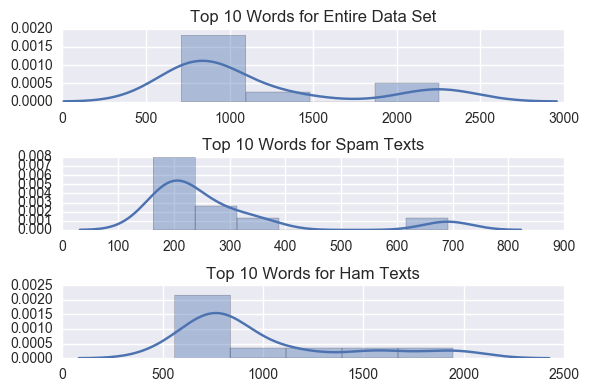

In [14]:
import warnings
warnings.filterwarnings("ignore")

#first we load the text into a data frame.
from sklearn.feature_extraction.text import CountVectorizer
count_vect = CountVectorizer()

lines = [" ".join(x.split('\t')[1:]) for x in open("data/SMSSpamCollection")]
bag_words = count_vect.fit_transform(lines)

import pandas as pd
df = pd.DataFrame(data=bag_words.toarray(),columns=count_vect.get_feature_names())

#add a column to determine whether a message is spam, or ham
df["spam"] = [x.split('\t')[0] for x in open("data/SMSSpamCollection")]

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

f, (a1,a2,a3) = plt.subplots(3)
sns.distplot(df[[x for x in df.columns if x!="spam"]].sum().sort_values()[-10:], hist=True, ax=a1)
a1.set_title("Top 10 Words for Entire Data Set")
sns.distplot(df[df.spam == "spam"][[x for x in df.columns if x!="spam"]].sum().sort_values()[-10:], hist=True, ax=a2)
a2.set_title("Top 10 Words for Spam Texts")
sns.distplot(df[df.spam=="ham"][[x for x in df.columns if x!="spam"]].sum().sort_values()[-10:], hist=True, ax=a3)
a3.set_title("Top 10 Words for Ham Texts")

plt.tight_layout()
plt.show()


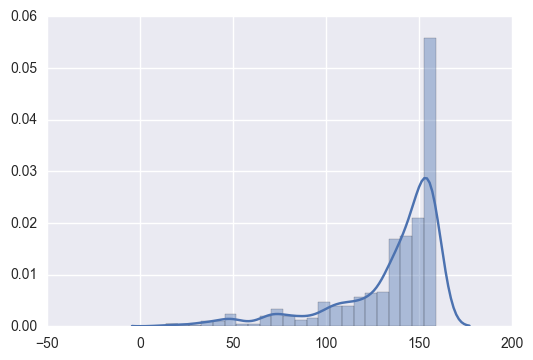

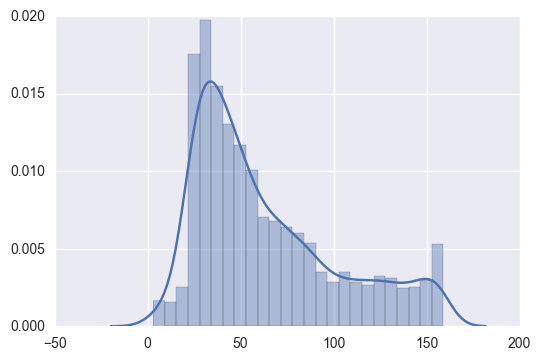

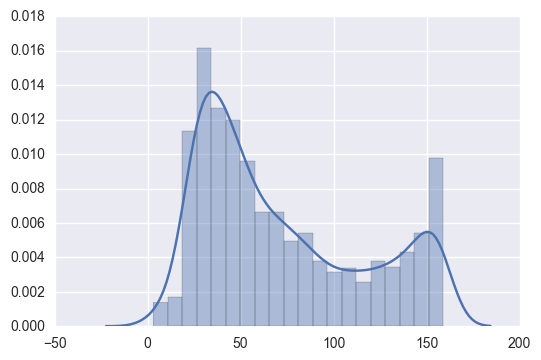

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

spam_lines = [" ".join(x.split("\t")[1:]) for x in open("data/SMSSpamCollection") if x.split('\t')[0] == "spam"]
ham_lines = [" ".join(x.split("\t")[1:]) for x in open("data/SMSSpamCollection") if x.split('\t')[0] == "ham"]
total_lines = [" ".join(x.split("\t")[1:]) for x in open("data/SMSSpamCollection")]

#filter out texts longer than 160, SMS cuts off here
spam_lines = filter(lambda x:len(x) < 160,spam_lines)
ham_lines = filter(lambda x:len(x) < 160,ham_lines)
total_lines = filter(lambda x:len(x) < 160,total_lines)

sns.distplot([len(x) for x in spam_lines]);
plt.show()
sns.distplot([len(x) for x in ham_lines]);
plt.show()
sns.distplot([len(x) for x in total_lines]);
plt.show()


# Word Clouds
We took the time to create two word clouds: one for spam and one for ham.  

We accomplished this using an online tool at, the source code for the project is at https://github.com/jasondavies/d3-cloud.  There is an interactive session interfact that makes creating a word cloud easily.

These are both depicted below.

###### Ham
![ham](img/ham.png "Ham")
As we can, ham has a lot of words that relate to making plans.  Come, going, just, and want all relate to making plans.  We also see pronouns like I, ur, and Id.  There are lots of abbreviations such as 4, 2, lol, and u.

Spam:
![spam](img/spam.png "Spam")
In the spam word cloud, we see pretty much exactly what I would expect to see.  Words like free, cash, won, and win all make sense.  However, one really interesting thing that showed up was Nokia.